# Recognition of Tamil Actors using PCA and SVM
## A1-Import system Libraries

In [1]:
import os
import warnings
warnings.simplefilter('ignore')

## A2-Import the DataHandling Libraries
### 1. Numpy
### 2. Pandas

In [2]:
import numpy as np
import pandas as pd

## A3-Import Datavisualization Library
### Matplotlib

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


## A4- Import required compnents from image processing library
    scikit-image is our image processing library
    we need to import following functions
        * imread
        * imshow
        * resize
        * rgb2gray

In [5]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray

## B1-Setting working directory
    - os.listdir is a command used to get the list of elements in a directory
    - In the above cell we are trying to create a list rajini which has the images
    - present in the folder rajinikanth
    - These images are located in the folder rajinikanth in the system
    - we can access this folder by os.listdir
    - Now rajini is a list of 100 images
    - Now vijay is a list of 100 images
    - Now dhanush is a list of 100 images

In [6]:
rajini=os.listdir("Actors\\Rajinikanth")

In [7]:
rajini

['1.JPG',
 '10.JPG',
 '11.JPG',
 '12.JPG',
 '13.JPG',
 '14.JPG',
 '15.JPG',
 '16.JPG',
 '17.JPG',
 '18.JPG',
 '19.JPG',
 '2.JPG',
 '20.JPG',
 '21.JPG',
 '22.JPG',
 '23.JPG',
 '24.JPG',
 '25.JPG',
 '26.JPG',
 '27.JPG',
 '28.JPG',
 '29.JPG',
 '3.JPG',
 '30.JPG',
 '4.JPG',
 '5.JPG',
 '6.JPG',
 '7.JPG',
 '8.JPG',
 '9.JPG']

In [8]:
vijay=os.listdir("Actors\\Vijay")

In [9]:
vijay

['1.JPG',
 '10.JPG',
 '11.JPG',
 '12.JPG',
 '13.JPG',
 '14.JPG',
 '15.JPG',
 '16.JPG',
 '17.JPG',
 '18.JPG',
 '19.JPG',
 '2.JPG',
 '20.JPG',
 '21.JPG',
 '22.JPG',
 '23.JPG',
 '24.JPG',
 '25.JPG',
 '26.JPG',
 '27.JPG',
 '28.JPG',
 '29.JPG',
 '3.JPG',
 '30.JPG',
 '4.JPG',
 '5.JPG',
 '6.JPG',
 '7.JPG',
 '8.JPG',
 '9.JPG']

In [10]:
dhanush=os.listdir("Actors\\Dhanush")

In [11]:
dhanush

['1.PNG',
 '10.PNG',
 '11.PNG',
 '12.PNG',
 '13.PNG',
 '14.PNG',
 '15.PNG',
 '16.PNG',
 '17.PNG',
 '18.PNG',
 '19.PNG',
 '2.PNG',
 '20.PNG',
 '21.PNG',
 '22.PNG',
 '23.PNG',
 '24.PNG',
 '25.PNG',
 '26.PNG',
 '27.PNG',
 '28.PNG',
 '29.PNG',
 '3.PNG',
 '30.PNG',
 '4.PNG',
 '5.PNG',
 '6.PNG',
 '7.PNG',
 '8.PNG',
 '9.PNG']

# B2-Reading Image as a matrix of numbers

In [12]:
limit=10
rajini_images=[None]*limit #create 10 empty spacs to store images
j=0
for i in rajini:
    if(j<limit):
        rajini_images[j]=imread("Actors\\Rajinikanth\\"+i)
        j+=1
    else:
        break

In [13]:
vijay_images=[None]*limit
j=0
for i in vijay:
    if(j<limit):
        vijay_images[j]=imread("Actors\\Vijay\\"+i)
        j+=1
    else:
        break

In [14]:
dhanush_images=[None]*limit
j=0
for i in dhanush:
    if(j<limit):
        dhanush_images[j]=imread("Actors\\Dhanush\\"+i)
        j+=1
    else:
        break

## B2.1- View the images
#### imshow()
    #### The input will be ndarray or image file
    #### This command displays an image

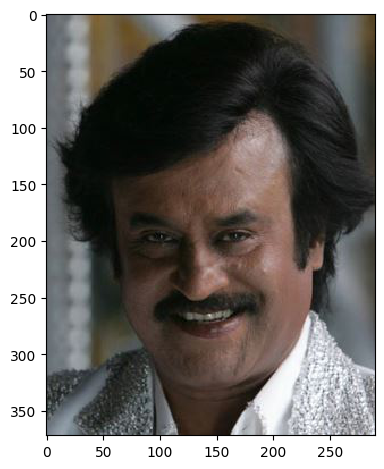

In [15]:
imshow(rajini_images[7])

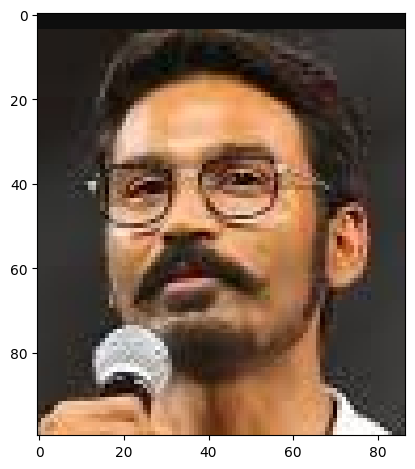

In [16]:
imshow(dhanush_images[4])

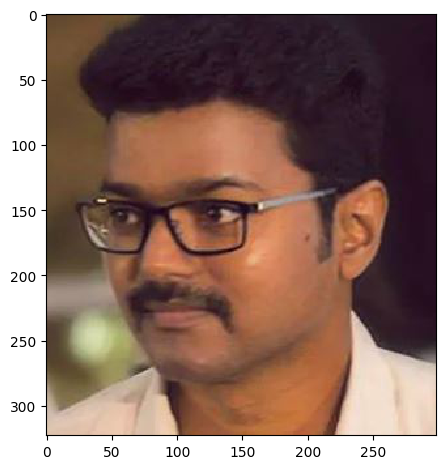

In [17]:
imshow(vijay_images[9])

## B3-Convert Color images to Gray scale Images
    rgb2gray
        This command converts an image with rgb image to gray image
        rgb means red blue green

In [18]:
rajinikanth_gray=[None]*limit
j=0
for i in rajini:
    if(j<limit):
        rajinikanth_gray[j]=rgb2gray(rajini_images[j])
        j+=1
    else:
        break

In [19]:
dhanush_gray=[None]*limit
j=0
for i in dhanush:
    if(j<limit):
        dhanush_gray[j]=rgb2gray(dhanush_images[j][:,:,:3])
        j+=1
    else:
        break

In [20]:
vijay_gray=[None]*limit
j=0
for i in vijay:
    if(j<limit):
        vijay_gray[j]=rgb2gray(vijay_images[j])
        j+=1
    else:
        break

## B3.2-View the gray scale Images

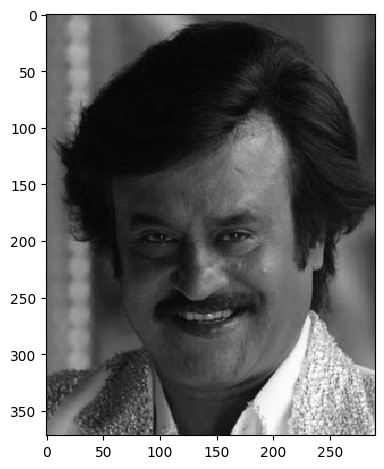

In [21]:
imshow(rajinikanth_gray[7])

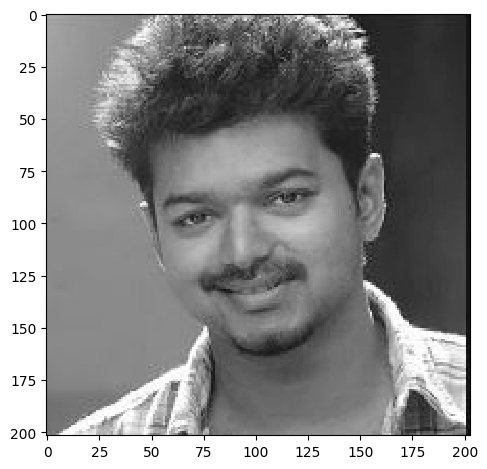

In [22]:
imshow(vijay_gray[1])

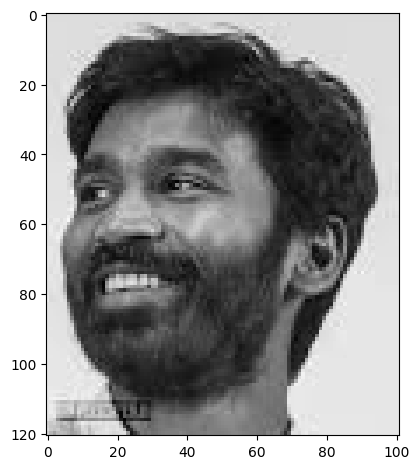

In [23]:
imshow(dhanush_gray[2])

## B4.0-Check the image matrix size before resizing
   ### Check the shape of each image using .shape function
   ##### The images we have selected are in different sizes

In [24]:
rajinikanth_gray[2].shape

(394, 380)

In [25]:
rajinikanth_gray[3].shape

(391, 326)

In [26]:
rajinikanth_gray[1].shape

(226, 181)

In [27]:
rajinikanth_gray[5].shape

(268, 252)

# B4.1-Matrix Resizing
    We need to resize them to a standard resolution
        -For the given dataset 512x512 is looking good
        -So let's resize the image using resize() command

In [28]:
for j in range (10):
    rk=rajinikanth_gray[j]
    rajinikanth_gray[j]=resize(rk,(512,512))

resize() : 
The resize command takes the image and the size as inputs

In [29]:
for j in range (10):
    g=dhanush_gray[j]
    dhanush_gray[j]=resize(g,(512,512))

In [30]:
for j in range (10):
    k=vijay_gray[j]
    vijay_gray[j]=resize(k,(512,512))

## B4.2-View the resized images

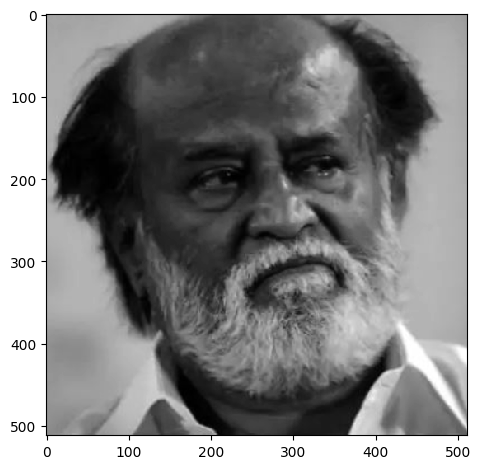

In [31]:
imshow(rajinikanth_gray[2])

In [32]:
rajinikanth_gray[0].shape

(512, 512)

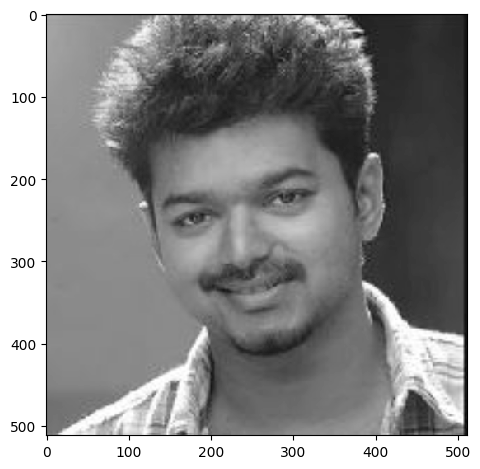

In [33]:
imshow(vijay_gray[1])

In [34]:
vijay_gray[1].shape

(512, 512)

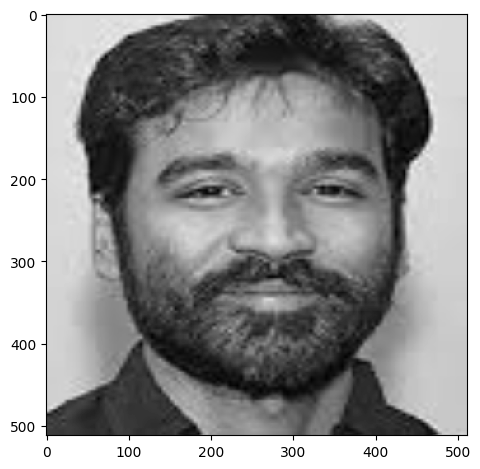

In [35]:
imshow(dhanush_gray[3])

## B6-Image matrix to vector conversion
#### In this step we need to convert the image which is in matrix form to vector
## Step B6.0: Find out the number of gray_scale images

In [36]:
len_of_images_rajinikanth=len(rajinikanth_gray)

In [37]:
len_of_images_rajinikanth

10

## Step B6.1: Create a variable image_size_rajinikanth
    - step3: This variable should have the size of the image
    - Output of this variable will be (512,512)

In [38]:
image_size_rajinikanth=rajinikanth_gray[1].shape

In [39]:
image_size_rajinikanth

(512, 512)

In [40]:
512 * 512

262144

## Step B6.2: Create a variable flatten_size_rajinikanth which contains the product of (512,512)

In [41]:
flatten_size_rajinikanth=image_size_rajinikanth[0]*image_size_rajinikanth[1]

In [42]:
flatten_size_rajinikanth

262144

## Step B6.3:Now flatten the image from (512,512) matrix to 262144,1 vector

In [43]:
for i in range(len_of_images_rajinikanth):
    rajinikanth_gray[i]=np.ndarray.flatten(rajinikanth_gray[i]).reshape(flatten_size_rajinikanth,1)

In [44]:
rajinikanth_gray

[array([[0.48661536],
        [0.47693604],
        [0.45956605],
        ...,
        [0.65300456],
        [0.73290893],
        [0.77019684]]),
 array([[0.01371412],
        [0.01371412],
        [0.01371412],
        ...,
        [0.76664209],
        [0.7708011 ],
        [0.76735441]]),
 array([[0.64168588],
        [0.64168588],
        [0.64168588],
        ...,
        [0.37849896],
        [0.37558842],
        [0.37368891]]),
 array([[0.89087324],
        [0.88778304],
        [0.88090473],
        ...,
        [0.97268503],
        [0.96728612],
        [0.96542284]]),
 array([[0.85316   ],
        [0.85316   ],
        [0.85316   ],
        ...,
        [0.90212647],
        [0.9058409 ],
        [0.90214819]]),
 array([[0.54227064],
        [0.54227225],
        [0.54222142],
        ...,
        [0.20985216],
        [0.20985216],
        [0.20985216]]),
 array([[0.29626471],
        [0.29626471],
        [0.29626471],
        ...,
        [0.3467975 ],
        [0.345152

## Step B6.4: Now Stack the individual image array elements into one array
      - This process is called stacking
      - We use the function np.dstack

In [45]:
rajinikanth_gray=np.dstack(rajinikanth_gray)

In [46]:
rajinikanth_gray

array([[[0.48661536, 0.01371412, 0.64168588, ..., 0.39613999,
         0.45709088, 0.72330226]],

       [[0.47693604, 0.01371412, 0.64168588, ..., 0.39666082,
         0.46817638, 0.72291983]],

       [[0.45956605, 0.01371412, 0.64168588, ..., 0.39888202,
         0.4319855 , 0.72331838]],

       ...,

       [[0.65300456, 0.76664209, 0.37849896, ..., 0.81315735,
         0.80342683, 0.88060975]],

       [[0.73290893, 0.7708011 , 0.37558842, ..., 0.80759567,
         0.79382356, 0.87981017]],

       [[0.77019684, 0.76735441, 0.37368891, ..., 0.80629155,
         0.7967651 , 0.8805774 ]]])

In [47]:
rajinikanth_gray.shape

(262144, 1, 10)

## Step B6.5: Now if needed change the axis of the array elements
    - In general when we work with images, we consider the array to have a shape of rowxcolumnxcolour_channel
    - But currently it is columnxcolour_channelxrow
    - To change this we need to use the np.rollaxis function

In [48]:
rajinikanth_gray=np.rollaxis(rajinikanth_gray,axis=2,start=0)

In [49]:
rajinikanth_gray.shape

(10, 262144, 1)

 - np.rollaxis This command is used to move the position of an axis in the ndarray
 - Currently we need to bring the data in axis 2 to axis 0

## Step B6.6:

In [50]:
rajinikanth_gray=rajinikanth_gray.reshape(len_of_images_rajinikanth,flatten_size_rajinikanth)

In [51]:
rajinikanth_gray.shape

(10, 262144)

## B7-Creating a Dataframe of the image Vectors
    - Now we need to convert our ndarray to Dataframe
    - A dataframe has proper indexing
    - To manipulate data and its positions, this helps us a lot
    - For this operation we need to use PANDAS library
    - In our initial steps we have imported our PANDAS library as pd
    - We need to use the function pd.DataFrame

In [52]:
rajini_data=pd.DataFrame(rajinikanth_gray)

### pd.DataFrame()
    - Pd.Dataframe is used to create a dataframe
    - The input should be a ndarray name

## Type the image dataframe name to look into the dataframe

In [53]:
rajini_data

0         1         2         3         4         5         6       \
0  0.486615  0.476936  0.459566  0.457015  0.436554  0.409642  0.404541   
1  0.013714  0.013714  0.013714  0.013714  0.013358  0.011972  0.010585   
2  0.641686  0.641686  0.641686  0.641686  0.641686  0.642834  0.643658   
3  0.890873  0.887783  0.880905  0.875911  0.873612  0.873326  0.875823   
4  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160   
5  0.542271  0.542272  0.542221  0.542194  0.542194  0.540877  0.537748   
6  0.296265  0.296265  0.296265  0.296736  0.298551  0.300186  0.300186   
7  0.396140  0.396661  0.398882  0.401103  0.403490  0.407628  0.411559   
8  0.457091  0.468176  0.431985  0.400734  0.486390  0.572046  0.609165   
9  0.723302  0.722920  0.723318  0.723717  0.724148  0.725074  0.726001   

     7         8         9       ...    262134    262135    262136    262137  \
0  0.415959  0.438221  0.437093  ...  0.680016  0.592632  0.630639  0.646237   
1  0.009793  0.009793  0.009793  ...  0.805310  0.796992  0.788674  0.779913   
2  0.643658  0.643658  0.644285  ...  0.395349  0.388119  0.385209  0.387598   
3  0.878320  0.880817  0.879263  ...  0.852682  0.897439  0.930921  0.962446   
4  0.853160  0.853160  0.853160  ...  0.875312  0.875365  0.875417  0.881774   
5  0.534226  0.530087  0.525848  ...  0.205241  0.205931  0.205931  0.206829   
6  0.300186  0.301890  0.303706  ...  0.347875  0.348697  0.349479  0.349628   
7  0.415049  0.416770  0.417074  ...  0.709839  0.715432  0.755912  0.839935   
8  0.628714  0.606412  0.528160  ...  0.839273  0.838295  0.835789  0.832140   
9  0.726833  0.726833  0.726833  ...  0.842339  0.855218  0.868096  0.873275   

     262138    262139    262140    262141    262142    262143  
0  0.622832  0.579713  0.576117  0.653005  0.732909  0.770197  
1  0.770821  0.761728  0.762483  0.766642  0.770801  0.767354  
2  0.385780  0.381406  0.381071  0.378499  0.375588  0.373689  
3  0.992479  0.990534  0.984377  0.972685  0.967286  0.965423  
4  0.888224  0.894674  0.898412  0.902126  0.905841  0.902148  
5  0.208299  0.209184  0.209644  0.209852  0.209852  0.209852  
6  0.349778  0.349052  0.348229  0.346797  0.345152  0.345416  
7  0.890377  0.924966  0.868962  0.813157  0.807596  0.806292  
8  0.827522  0.820229  0.812936  0.803427  0.793824  0.796765  
9  0.877587  0.881899  0.881409  0.880610  0.879810  0.880577  

[10 rows x 262144 columns]

## B8-Labelling the rows of the Dataframe
        - Here since it is supervised learning, we need to label the images
        - We need to tell the system that this image or data belongs to rajinikanth
        - For this we need to create a new column named Label with the label name

In [54]:
rajini_data["label"]="rajinikanth"

## Now check the dataframe again

In [55]:
rajini_data

0         1         2         3         4         5         6  \
0  0.486615  0.476936  0.459566  0.457015  0.436554  0.409642  0.404541   
1  0.013714  0.013714  0.013714  0.013714  0.013358  0.011972  0.010585   
2  0.641686  0.641686  0.641686  0.641686  0.641686  0.642834  0.643658   
3  0.890873  0.887783  0.880905  0.875911  0.873612  0.873326  0.875823   
4  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160   
5  0.542271  0.542272  0.542221  0.542194  0.542194  0.540877  0.537748   
6  0.296265  0.296265  0.296265  0.296736  0.298551  0.300186  0.300186   
7  0.396140  0.396661  0.398882  0.401103  0.403490  0.407628  0.411559   
8  0.457091  0.468176  0.431985  0.400734  0.486390  0.572046  0.609165   
9  0.723302  0.722920  0.723318  0.723717  0.724148  0.725074  0.726001   

          7         8         9  ...    262135    262136    262137    262138  \
0  0.415959  0.438221  0.437093  ...  0.592632  0.630639  0.646237  0.622832   
1  0.009793  0.009793  0.009793  ...  0.796992  0.788674  0.779913  0.770821   
2  0.643658  0.643658  0.644285  ...  0.388119  0.385209  0.387598  0.385780   
3  0.878320  0.880817  0.879263  ...  0.897439  0.930921  0.962446  0.992479   
4  0.853160  0.853160  0.853160  ...  0.875365  0.875417  0.881774  0.888224   
5  0.534226  0.530087  0.525848  ...  0.205931  0.205931  0.206829  0.208299   
6  0.300186  0.301890  0.303706  ...  0.348697  0.349479  0.349628  0.349778   
7  0.415049  0.416770  0.417074  ...  0.715432  0.755912  0.839935  0.890377   
8  0.628714  0.606412  0.528160  ...  0.838295  0.835789  0.832140  0.827522   
9  0.726833  0.726833  0.726833  ...  0.855218  0.868096  0.873275  0.877587   

     262139    262140    262141    262142    262143        label  
0  0.579713  0.576117  0.653005  0.732909  0.770197  rajinikanth  
1  0.761728  0.762483  0.766642  0.770801  0.767354  rajinikanth  
2  0.381406  0.381071  0.378499  0.375588  0.373689  rajinikanth  
3  0.990534  0.984377  0.972685  0.967286  0.965423  rajinikanth  
4  0.894674  0.898412  0.902126  0.905841  0.902148  rajinikanth  
5  0.209184  0.209644  0.209852  0.209852  0.209852  rajinikanth  
6  0.349052  0.348229  0.346797  0.345152  0.345416  rajinikanth  
7  0.924966  0.868962  0.813157  0.807596  0.806292  rajinikanth  
8  0.820229  0.812936  0.803427  0.793824  0.796765  rajinikanth  
9  0.881899  0.881409  0.880610  0.879810  0.880577  rajinikanth  

[10 rows x 262145 columns]

## Rinse and Repeat the same for dhanush and vijay
### Follow B6.0-B8 steps for dhanush

In [56]:
len_of_images_dhanush=len(dhanush_gray)

In [57]:
image_size_dhanush=dhanush_gray[1].shape

In [58]:
flatten_size_dhanush=image_size_dhanush[0]*image_size_dhanush[1]

In [59]:
flatten_size_dhanush

262144

In [60]:
for i in range(len_of_images_dhanush):
    dhanush_gray[i]=np.ndarray.flatten(dhanush_gray[i]).reshape(flatten_size_dhanush,1)

In [61]:
dhanush_gray=np.dstack(dhanush_gray)

In [62]:
dhanush_gray=np.rollaxis(dhanush_gray,axis=2,start=0)

In [63]:
dhanush_gray=dhanush_gray.reshape(len_of_images_dhanush,flatten_size_dhanush)

In [64]:
dhanush_gray.shape

(10, 262144)

In [65]:
dhanush_data=pd.DataFrame(dhanush_gray)

In [66]:
dhanush_data

0         1         2         3         4         5         6       \
0  0.054904  0.067981  0.071851  0.070615  0.069233  0.068403  0.067413   
1  0.780376  0.779488  0.781004  0.782521  0.784037  0.785554  0.787017   
2  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981   
3  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207   
4  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
5  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915   
6  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7  0.258122  0.258122  0.258122  0.258122  0.258122  0.258122  0.258122   
8  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
9  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

     7         8         9       ...    262134    262135    262136    262137  \
0  0.066628  0.066794  0.067624  ...  0.159989  0.162702  0.159220  0.156383   
1  0.787017  0.787017  0.786522  ...  0.789562  0.789562  0.789562  0.789562   
2  0.863981  0.863981  0.863981  ...  0.899275  0.899275  0.899275  0.899275   
3  0.855207  0.855207  0.855207  ...  0.797676  0.805240  0.812804  0.812589   
4  0.054902  0.054902  0.054902  ...  0.206693  0.204400  0.214395  0.224391   
5  0.946915  0.946915  0.946915  ...  0.946906  0.957045  0.964077  0.964990   
6  1.000000  1.000000  1.000000  ...  0.305475  0.305475  0.306356  0.307864   
7  0.258122  0.258122  0.258126  ...  0.774971  0.775310  0.775701  0.776092   
8  0.054902  0.054902  0.054902  ...  0.546116  0.547954  0.549792  0.551630   
9  1.000000  1.000000  1.000000  ...  0.054902  0.054902  0.054902  0.054902   

     262138    262139    262140    262141    262142    262143  
0  0.155411  0.155411  0.155411  0.155411  0.155411  0.155183  
1  0.794063  0.798729  0.801627  0.801627  0.801627  0.801627  
2  0.899275  0.899275  0.899275  0.899275  0.899275  0.899275  
3  0.805902  0.799216  0.792530  0.785844  0.790506  0.797192  
4  0.234386  0.244382  0.254377  0.255526  0.245531  0.235535  
5  0.963174  0.959502  0.962852  0.966466  0.962653  0.961667  
6  0.309372  0.310881  0.312389  0.313310  0.311802  0.310293  
7  0.776361  0.775918  0.775475  0.775032  0.774928  0.775371  
8  0.553469  0.555307  0.557145  0.556410  0.554572  0.552733  
9  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  

[10 rows x 262144 columns]

In [67]:
dhanush_data["label"]="dhanush"

In [68]:
dhanush_data

0         1         2         3         4         5         6  \
0  0.054904  0.067981  0.071851  0.070615  0.069233  0.068403  0.067413   
1  0.780376  0.779488  0.781004  0.782521  0.784037  0.785554  0.787017   
2  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981   
3  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207   
4  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
5  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915   
6  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7  0.258122  0.258122  0.258122  0.258122  0.258122  0.258122  0.258122   
8  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
9  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

          7         8         9  ...    262135    262136    262137    262138  \
0  0.066628  0.066794  0.067624  ...  0.162702  0.159220  0.156383  0.155411   
1  0.787017  0.787017  0.786522  ...  0.789562  0.789562  0.789562  0.794063   
2  0.863981  0.863981  0.863981  ...  0.899275  0.899275  0.899275  0.899275   
3  0.855207  0.855207  0.855207  ...  0.805240  0.812804  0.812589  0.805902   
4  0.054902  0.054902  0.054902  ...  0.204400  0.214395  0.224391  0.234386   
5  0.946915  0.946915  0.946915  ...  0.957045  0.964077  0.964990  0.963174   
6  1.000000  1.000000  1.000000  ...  0.305475  0.306356  0.307864  0.309372   
7  0.258122  0.258122  0.258126  ...  0.775310  0.775701  0.776092  0.776361   
8  0.054902  0.054902  0.054902  ...  0.547954  0.549792  0.551630  0.553469   
9  1.000000  1.000000  1.000000  ...  0.054902  0.054902  0.054902  0.054902   

     262139    262140    262141    262142    262143    label  
0  0.155411  0.155411  0.155411  0.155411  0.155183  dhanush  
1  0.798729  0.801627  0.801627  0.801627  0.801627  dhanush  
2  0.899275  0.899275  0.899275  0.899275  0.899275  dhanush  
3  0.799216  0.792530  0.785844  0.790506  0.797192  dhanush  
4  0.244382  0.254377  0.255526  0.245531  0.235535  dhanush  
5  0.959502  0.962852  0.966466  0.962653  0.961667  dhanush  
6  0.310881  0.312389  0.313310  0.311802  0.310293  dhanush  
7  0.775918  0.775475  0.775032  0.774928  0.775371  dhanush  
8  0.555307  0.557145  0.556410  0.554572  0.552733  dhanush  
9  0.054902  0.054902  0.054902  0.054902  0.054902  dhanush  

[10 rows x 262145 columns]

### Follow B6.0-B6.8 steps for vijay

In [69]:
len_of_images_vijay=len(vijay_gray)

In [70]:
image_size_vijay=vijay_gray[1].shape

In [71]:
flatten_size_vijay=image_size_vijay[0]*image_size_vijay[1]

In [72]:
flatten_size_vijay

262144

In [73]:
for i in range(len_of_images_vijay):
    vijay_gray[i]=np.ndarray.flatten(vijay_gray[i]).reshape(flatten_size_vijay,1)

In [74]:
vijay_gray=np.dstack(vijay_gray)

In [75]:
vijay_gray=np.rollaxis(vijay_gray,axis=2,start=0)

In [76]:
vijay_gray=vijay_gray.reshape(len_of_images_vijay,flatten_size_vijay)

In [77]:
vijay_gray.shape

(10, 262144)

In [78]:
vijay_data=pd.DataFrame(vijay_gray)

In [79]:
vijay_data

0         1         2         3         4         5         6       \
0  0.717085  0.717085  0.717085  0.717251  0.717485  0.717521  0.717521   
1  0.256975  0.256729  0.257200  0.257670  0.258525  0.259531  0.260479   
2  0.179172  0.179954  0.181869  0.181869  0.181707  0.181345  0.180983   
3  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852   
4  0.473707  0.473707  0.473707  0.473707  0.473707  0.473707  0.473500   
5  0.936140  0.937764  0.940537  0.943309  0.946082  0.948682  0.950926   
6  0.464262  0.464262  0.464262  0.462451  0.460334  0.460176  0.460621   
7  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155   
8  0.299987  0.299987  0.299987  0.299987  0.300619  0.302066  0.303514   
9  0.281830  0.281830  0.281830  0.281830  0.281830  0.281830  0.281830   

     7         8         9       ...    262134    262135    262136    262137  \
0  0.719593  0.721442  0.721442  ...  0.445938  0.449247  0.451500  0.453660   
1  0.261186  0.261893  0.261545  ...  0.468267  0.463806  0.471395  0.478984   
2  0.179969  0.176485  0.174838  ...  0.766631  0.773040  0.778230  0.779314   
3  0.079852  0.079852  0.079852  ...  0.185614  0.186184  0.187019  0.187853   
4  0.473272  0.473198  0.473198  ...  0.705510  0.703756  0.702002  0.700248   
5  0.951801  0.952045  0.951291  ...  0.898039  0.899962  0.901961  0.901961   
6  0.462819  0.463980  0.463980  ...  0.600736  0.603492  0.603989  0.602465   
7  0.572155  0.572155  0.572155  ...  0.541455  0.544542  0.548236  0.549237   
8  0.304961  0.306409  0.307857  ...  0.429532  0.452724  0.475886  0.494587   
9  0.281830  0.281830  0.281830  ...  0.817033  0.819230  0.821757  0.825199   

     262138    262139    262140    262141    262142    262143  
0  0.459013  0.463538  0.463538  0.463396  0.462911  0.462844  
1  0.359247  0.208750  0.096865  0.082686  0.068507  0.075911  
2  0.779666  0.781724  0.782087  0.781066  0.783247  0.784166  
3  0.191673  0.195823  0.200479  0.206116  0.211753  0.208596  
4  0.698808  0.700562  0.702316  0.705231  0.708345  0.707611  
5  0.904358  0.905882  0.906081  0.911627  0.913725  0.913725  
6  0.602379  0.602789  0.609136  0.615174  0.618602  0.619343  
7  0.552494  0.559502  0.565000  0.569739  0.568901  0.568631  
8  0.501380  0.508173  0.508440  0.503652  0.498864  0.502258  
9  0.826943  0.826943  0.829251  0.832161  0.834451  0.835109  

[10 rows x 262144 columns]

In [80]:
vijay_data["label"]="vijay"

In [81]:
vijay_data

0         1         2         3         4         5         6  \
0  0.717085  0.717085  0.717085  0.717251  0.717485  0.717521  0.717521   
1  0.256975  0.256729  0.257200  0.257670  0.258525  0.259531  0.260479   
2  0.179172  0.179954  0.181869  0.181869  0.181707  0.181345  0.180983   
3  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852   
4  0.473707  0.473707  0.473707  0.473707  0.473707  0.473707  0.473500   
5  0.936140  0.937764  0.940537  0.943309  0.946082  0.948682  0.950926   
6  0.464262  0.464262  0.464262  0.462451  0.460334  0.460176  0.460621   
7  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155   
8  0.299987  0.299987  0.299987  0.299987  0.300619  0.302066  0.303514   
9  0.281830  0.281830  0.281830  0.281830  0.281830  0.281830  0.281830   

          7         8         9  ...    262135    262136    262137    262138  \
0  0.719593  0.721442  0.721442  ...  0.449247  0.451500  0.453660  0.459013   
1  0.261186  0.261893  0.261545  ...  0.463806  0.471395  0.478984  0.359247   
2  0.179969  0.176485  0.174838  ...  0.773040  0.778230  0.779314  0.779666   
3  0.079852  0.079852  0.079852  ...  0.186184  0.187019  0.187853  0.191673   
4  0.473272  0.473198  0.473198  ...  0.703756  0.702002  0.700248  0.698808   
5  0.951801  0.952045  0.951291  ...  0.899962  0.901961  0.901961  0.904358   
6  0.462819  0.463980  0.463980  ...  0.603492  0.603989  0.602465  0.602379   
7  0.572155  0.572155  0.572155  ...  0.544542  0.548236  0.549237  0.552494   
8  0.304961  0.306409  0.307857  ...  0.452724  0.475886  0.494587  0.501380   
9  0.281830  0.281830  0.281830  ...  0.819230  0.821757  0.825199  0.826943   

     262139    262140    262141    262142    262143  label  
0  0.463538  0.463538  0.463396  0.462911  0.462844  vijay  
1  0.208750  0.096865  0.082686  0.068507  0.075911  vijay  
2  0.781724  0.782087  0.781066  0.783247  0.784166  vijay  
3  0.195823  0.200479  0.206116  0.211753  0.208596  vijay  
4  0.700562  0.702316  0.705231  0.708345  0.707611  vijay  
5  0.905882  0.906081  0.911627  0.913725  0.913725  vijay  
6  0.602789  0.609136  0.615174  0.618602  0.619343  vijay  
7  0.559502  0.565000  0.569739  0.568901  0.568631  vijay  
8  0.508173  0.508440  0.503652  0.498864  0.502258  vijay  
9  0.826943  0.829251  0.832161  0.834451  0.835109  vijay  

[10 rows x 262145 columns]

## C1-Combining three individual dataframes to one dataframe
    - Now we are looking forward to make a single dataset
    - We need to concantenate three dataframes into one dataframe
    - vijay, Rajinikanth, dhanush into one dataframe(actor_1)

In [82]:
actor_1=pd.concat([rajini_data,dhanush_data])

In [83]:
actor=pd.concat([actor_1,vijay_data])

In [84]:
actor

0         1         2         3         4         5         6  \
0  0.486615  0.476936  0.459566  0.457015  0.436554  0.409642  0.404541   
1  0.013714  0.013714  0.013714  0.013714  0.013358  0.011972  0.010585   
2  0.641686  0.641686  0.641686  0.641686  0.641686  0.642834  0.643658   
3  0.890873  0.887783  0.880905  0.875911  0.873612  0.873326  0.875823   
4  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160   
5  0.542271  0.542272  0.542221  0.542194  0.542194  0.540877  0.537748   
6  0.296265  0.296265  0.296265  0.296736  0.298551  0.300186  0.300186   
7  0.396140  0.396661  0.398882  0.401103  0.403490  0.407628  0.411559   
8  0.457091  0.468176  0.431985  0.400734  0.486390  0.572046  0.609165   
9  0.723302  0.722920  0.723318  0.723717  0.724148  0.725074  0.726001   
0  0.054904  0.067981  0.071851  0.070615  0.069233  0.068403  0.067413   
1  0.780376  0.779488  0.781004  0.782521  0.784037  0.785554  0.787017   
2  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981   
3  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207   
4  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
5  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915   
6  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
7  0.258122  0.258122  0.258122  0.258122  0.258122  0.258122  0.258122   
8  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
9  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
0  0.717085  0.717085  0.717085  0.717251  0.717485  0.717521  0.717521   
1  0.256975  0.256729  0.257200  0.257670  0.258525  0.259531  0.260479   
2  0.179172  0.179954  0.181869  0.181869  0.181707  0.181345  0.180983   
3  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852   
4  0.473707  0.473707  0.473707  0.473707  0.473707  0.473707  0.473500   
5  0.936140  0.937764  0.940537  0.943309  0.946082  0.948682  0.950926   
6  0.464262  0.464262  0.464262  0.462451  0.460334  0.460176  0.460621   
7  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155   
8  0.299987  0.299987  0.299987  0.299987  0.300619  0.302066  0.303514   
9  0.281830  0.281830  0.281830  0.281830  0.281830  0.281830  0.281830   

          7         8         9  ...    262135    262136    262137    262138  \
0  0.415959  0.438221  0.437093  ...  0.592632  0.630639  0.646237  0.622832   
1  0.009793  0.009793  0.009793  ...  0.796992  0.788674  0.779913  0.770821   
2  0.643658  0.643658  0.644285  ...  0.388119  0.385209  0.387598  0.385780   
3  0.878320  0.880817  0.879263  ...  0.897439  0.930921  0.962446  0.992479   
4  0.853160  0.853160  0.853160  ...  0.875365  0.875417  0.881774  0.888224   
5  0.534226  0.530087  0.525848  ...  0.205931  0.205931  0.206829  0.208299   
6  0.300186  0.301890  0.303706  ...  0.348697  0.349479  0.349628  0.349778   
7  0.415049  0.416770  0.417074  ...  0.715432  0.755912  0.839935  0.890377   
8  0.628714  0.606412  0.528160  ...  0.838295  0.835789  0.832140  0.827522   
9  0.726833  0.726833  0.726833  ...  0.855218  0.868096  0.873275  0.877587   
0  0.066628  0.066794  0.067624  ...  0.162702  0.159220  0.156383  0.155411   
1  0.787017  0.787017  0.786522  ...  0.789562  0.789562  0.789562  0.794063   
2  0.863981  0.863981  0.863981  ...  0.899275  0.899275  0.899275  0.899275   
3  0.855207  0.855207  0.855207  ...  0.805240  0.812804  0.812589  0.805902   
4  0.054902  0.054902  0.054902  ...  0.204400  0.214395  0.224391  0.234386   
5  0.946915  0.946915  0.946915  ...  0.957045  0.964077  0.964990  0.963174   
6  1.000000  1.000000  1.000000  ...  0.305475  0.306356  0.307864  0.309372   
7  0.258122  0.258122  0.258126  ...  0.775310  0.775701  0.776092  0.776361   
8  0.054902  0.054902  0.054902  ...  0.547954  0.549792  0.551630  0.553469   
9  1.000000  1.000000  1.000000  ...  0.054902  0.054902  0.054902  0.054902   
0  0

### pd.concat()
    pd.concat is used to combine two dataframes
    The input is the individual dataframe

### C2-Shuffling within Final dataframe
        - We need to mix our dataset well enough
        - We are shuffling so that the system learn from the entire distribution
        - We need to use the command shuffle which is imported from utils module of scikitlearn

In [85]:
from sklearn.utils import shuffle

In [86]:
kollywood_indexed=shuffle(actor).reset_index()

In [87]:
kollywood_indexed

index         0         1         2         3         4         5  \
0       6  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1       8  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
2       1  0.780376  0.779488  0.781004  0.782521  0.784037  0.785554   
3       0  0.054904  0.067981  0.071851  0.070615  0.069233  0.068403   
4       0  0.486615  0.476936  0.459566  0.457015  0.436554  0.409642   
5       9  0.281830  0.281830  0.281830  0.281830  0.281830  0.281830   
6       7  0.258122  0.258122  0.258122  0.258122  0.258122  0.258122   
7       7  0.396140  0.396661  0.398882  0.401103  0.403490  0.407628   
8       1  0.256975  0.256729  0.257200  0.257670  0.258525  0.259531   
9       0  0.717085  0.717085  0.717085  0.717251  0.717485  0.717521   
10      4  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
11      9  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
12      3  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207   
13      7  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155   
14      3  0.890873  0.887783  0.880905  0.875911  0.873612  0.873326   
15      3  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852   
16      1  0.013714  0.013714  0.013714  0.013714  0.013358  0.011972   
17      8  0.457091  0.468176  0.431985  0.400734  0.486390  0.572046   
18      8  0.299987  0.299987  0.299987  0.299987  0.300619  0.302066   
19      6  0.296265  0.296265  0.296265  0.296736  0.298551  0.300186   
20      5  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915   
21      4  0.473707  0.473707  0.473707  0.473707  0.473707  0.473707   
22      5  0.936140  0.937764  0.940537  0.943309  0.946082  0.948682   
23      2  0.641686  0.641686  0.641686  0.641686  0.641686  0.642834   
24      6  0.464262  0.464262  0.464262  0.462451  0.460334  0.460176   
25      2  0.179172  0.179954  0.181869  0.181869  0.181707  0.181345   
26      9  0.723302  0.722920  0.723318  0.723717  0.724148  0.725074   
27      2  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981   
28      5  0.542271  0.542272  0.542221  0.542194  0.542194  0.540877   
29      4  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160   

           6         7         8  ...    262135    262136    262137    262138  \
0   1.000000  1.000000  1.000000  ...  0.305475  0.306356  0.307864  0.309372   
1   0.054902  0.054902  0.054902  ...  0.547954  0.549792  0.551630  0.553469   
2   0.787017  0.787017  0.787017  ...  0.789562  0.789562  0.789562  0.794063   
3   0.067413  0.066628  0.066794  ...  0.162702  0.159220  0.156383  0.155411   
4   0.404541  0.415959  0.438221  ...  0.592632  0.630639  0.646237  0.622832   
5   0.281830  0.281830  0.281830  ...  0.819230  0.821757  0.825199  0.826943   
6   0.258122  0.258122  0.258122  ...  0.775310  0.775701  0.776092  0.776361   
7   0.411559  0.415049  0.416770  ...  0.715432  0.755912  0.839935  0.890377   
8   0.260479  0.261186  0.261893  ...  0.463806  0.471395  0.478984  0.359247   
9   0.717521  0.719593  0.721442  ...  0.449247  0.451500  0.453660  0.459013   
10  0.054902  0.054902  0.054902  ...  0.204400  0.214395  0.224391  0.234386   
11  1.000000  1.000000  1.000000  ...  0.054902  0.054902  0.054902  0.054902   
12  0.855207  0.855207  0.855207  ...  0.805240  0.812804  0.812589  0.805902   
13  0.572155  0.572155  0.572155  ...  0.544542  0.548236  0.549237  0.552494   
14  0.875823  0.878320  0.880817  ...  0.897439  0.930921  0.962446  0.992479   
15  0.079852  0.079852  0.079852  ...  0.186184  0.187019  0.187853  0.191673   
16  0.010585  0.009793  0.009793  ...  0.796992  0.788674  0.779913  0.770821   
17  0.609165  0.628714  0.606412  ...  0.838295  0.835789  0.832140  0.827522   
18  0.303514  0.304961  0.306409  ...  0.452724  0.475886  0.494587  0.501380   
19  0.300186  0.300186  0.301890  ...  0.348697  0.349479  0.349628  0.349778   
20  0.946915  0.946915  0.946915  ...  

### C3-Removing Index from Final Dataset
    - Shuffling adds a new column which tells the index value
    - The only reason of this column is to tell us where the row has been shifted to
    - To remove the index, we need to use the command pd.drop()

In [88]:
kollywood_actors=kollywood_indexed.drop(['index'],axis=1)

In [89]:
kollywood_actors

0         1         2         3         4         5         6  \
0   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1   0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
2   0.780376  0.779488  0.781004  0.782521  0.784037  0.785554  0.787017   
3   0.054904  0.067981  0.071851  0.070615  0.069233  0.068403  0.067413   
4   0.486615  0.476936  0.459566  0.457015  0.436554  0.409642  0.404541   
5   0.281830  0.281830  0.281830  0.281830  0.281830  0.281830  0.281830   
6   0.258122  0.258122  0.258122  0.258122  0.258122  0.258122  0.258122   
7   0.396140  0.396661  0.398882  0.401103  0.403490  0.407628  0.411559   
8   0.256975  0.256729  0.257200  0.257670  0.258525  0.259531  0.260479   
9   0.717085  0.717085  0.717085  0.717251  0.717485  0.717521  0.717521   
10  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902  0.054902   
11  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
12  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207  0.855207   
13  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155  0.572155   
14  0.890873  0.887783  0.880905  0.875911  0.873612  0.873326  0.875823   
15  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852  0.079852   
16  0.013714  0.013714  0.013714  0.013714  0.013358  0.011972  0.010585   
17  0.457091  0.468176  0.431985  0.400734  0.486390  0.572046  0.609165   
18  0.299987  0.299987  0.299987  0.299987  0.300619  0.302066  0.303514   
19  0.296265  0.296265  0.296265  0.296736  0.298551  0.300186  0.300186   
20  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915  0.946915   
21  0.473707  0.473707  0.473707  0.473707  0.473707  0.473707  0.473500   
22  0.936140  0.937764  0.940537  0.943309  0.946082  0.948682  0.950926   
23  0.641686  0.641686  0.641686  0.641686  0.641686  0.642834  0.643658   
24  0.464262  0.464262  0.464262  0.462451  0.460334  0.460176  0.460621   
25  0.179172  0.179954  0.181869  0.181869  0.181707  0.181345  0.180983   
26  0.723302  0.722920  0.723318  0.723717  0.724148  0.725074  0.726001   
27  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981  0.863981   
28  0.542271  0.542272  0.542221  0.542194  0.542194  0.540877  0.537748   
29  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160  0.853160   

           7         8         9  ...    262135    262136    262137    262138  \
0   1.000000  1.000000  1.000000  ...  0.305475  0.306356  0.307864  0.309372   
1   0.054902  0.054902  0.054902  ...  0.547954  0.549792  0.551630  0.553469   
2   0.787017  0.787017  0.786522  ...  0.789562  0.789562  0.789562  0.794063   
3   0.066628  0.066794  0.067624  ...  0.162702  0.159220  0.156383  0.155411   
4   0.415959  0.438221  0.437093  ...  0.592632  0.630639  0.646237  0.622832   
5   0.281830  0.281830  0.281830  ...  0.819230  0.821757  0.825199  0.826943   
6   0.258122  0.258122  0.258126  ...  0.775310  0.775701  0.776092  0.776361   
7   0.415049  0.416770  0.417074  ...  0.715432  0.755912  0.839935  0.890377   
8   0.261186  0.261893  0.261545  ...  0.463806  0.471395  0.478984  0.359247   
9   0.719593  0.721442  0.721442  ...  0.449247  0.451500  0.453660  0.459013   
10  0.054902  0.054902  0.054902  ...  0.204400  0.214395  0.224391  0.234386   
11  1.000000  1.000000  1.000000  ...  0.054902  0.054902  0.054902  0.054902   
12  0.855207  0.855207  0.855207  ...  0.805240  0.812804  0.812589  0.805902   
13  0.572155  0.572155  0.572155  ...  0.544542  0.548236  0.549237  0.552494   
14  0.878320  0.880817  0.879263  ...  0.897439  0.930921  0.962446  0.992479   
15  0.079852  0.079852  0.079852  ...  0.186184  0.187019  0.187853  0.191673   
16  0.009793  0.009793  0.009793  ...  0.796992  0.788674  0.779913  0.770821   
17  0.628714  0.606412  0.528160  ...  0.838295  0.835789  0.832140  0.827522   
18  0.304961  0.306409  0.307857  ...  0.452724  0.475886  0.494587  0.501380   
19  0.300186  0.301890  0.303706  

### C4-Final Data saving
    - Now our dataset is ready
    -We need to save this dataset as a csv file
    - A csv file can be shared easily
    - To save the file, we need to use the command df. to_csv
    - Once this is applied, a new file is created in the location we have mentioned

## D1-Assigning Dependent and Independent Variables
    - In this step we need to tell our system which is the dependent variable and independent variable
    - We assign all the column elements except the label as x
    - The label we assign it to y

In [90]:
x=kollywood_actors.values[:,:-1]

In [91]:
x

array([[1.0, 1.0, 1.0, ..., 0.31331004485485603, 0.31180170338350177,
        0.3102933619121476],
       [0.054901960784313725, 0.054901960784313725, 0.054901960784313725,
        ..., 0.5564097954963235, 0.5545715602022059, 0.5527333249080882],
       [0.7803762377450981, 0.7794877573529413, 0.7810043014705884, ...,
        0.8016270036764707, 0.8016270036764707, 0.8016270036764707],
       ...,
       [0.863981176470588, 0.8639811764705881, 0.863981176470588, ...,
        0.8992752941176472, 0.8992752941176472, 0.8992752941176471],
       [0.5422706382123161, 0.5422722520297182, 0.5422214167815564, ...,
        0.2098521568627451, 0.2098521568627451, 0.20985215686274514],
       [0.8531599999999999, 0.8531599999999999, 0.8531599999999999, ...,
        0.9021264695470473, 0.905840903787052, 0.9021481913847083]],
      dtype=object)

In [92]:
y=kollywood_actors.values[:,-1]

In [93]:
y

array(['dhanush', 'dhanush', 'dhanush', 'dhanush', 'rajinikanth', 'vijay',
       'dhanush', 'rajinikanth', 'vijay', 'vijay', 'dhanush', 'dhanush',
       'dhanush', 'vijay', 'rajinikanth', 'vijay', 'rajinikanth',
       'rajinikanth', 'vijay', 'rajinikanth', 'dhanush', 'vijay', 'vijay',
       'rajinikanth', 'vijay', 'vijay', 'rajinikanth', 'dhanush',
       'rajinikanth', 'rajinikanth'], dtype=object)

### D2- Assigning Training and Test dataset
    - Now we need to divide the complete dataset into training set and test set
    - We teach the system using the training set
    - We evaluate the model using the test set
    - To perform this operation, we need to import the function train_test_split()from the module model_selection

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [96]:
x_train.shape

(24, 262144)

In [97]:
x_test.shape

(6, 262144)

# D3- Principle Componant Analysis(PCA) Algorithm
    - This step is used as a preprocesisng step before machine learning
    - The output of the images after this step is called eigen faces or ghost faces
    - PCA comes under unsupervised learning
    - The process PCA follows is called Dimensionaliity Reduction
    - PCA is imported from the module decomposition in the scikitlearn library

In [98]:
from sklearn import decomposition

# D4- Componenet Assignement for PCA
    - We need to reduce the dimension of our image
    - So we are going to reduce the image dimension to 90 components
    - Set whiten to True
    - Set a random generator(random_state) to 1

In [99]:
pca = decomposition.PCA(n_components=20, whiten=True, random_state=1)

# D5- Fitting the training set to generate principle components

In [100]:
pca.fit(x_train)

PCA(n_components=20, random_state=1, whiten=True)

# D6- Transforming principle components
We are transforming our training set and test set into principle components to make the process simple

In [101]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [102]:
x_train_pca.shape

(24, 20)

In [103]:
x_test_pca.shape

(6, 20)

# D7- Viewing the principle components or eigen faces
## D7.1- Reshape the image back to the original matrix size

In [104]:
eigen = (np.reshape(x[10],(512,512)).astype(np.float64))

In [105]:
eigen

array([[0.05490196, 0.05490196, 0.05490196, ..., 0.05490196, 0.05490196,
        0.05490196],
       [0.05490196, 0.05490196, 0.05490196, ..., 0.05490196, 0.05490196,
        0.05490196],
       [0.05490196, 0.05490196, 0.05490196, ..., 0.05490196, 0.05490196,
        0.05490196],
       ...,
       [0.61159459, 0.58374379, 0.55589299, ..., 0.24327106, 0.23327566,
        0.22328025],
       [0.62100343, 0.59588575, 0.57076807, ..., 0.24939851, 0.23940311,
        0.2294077 ],
       [0.63041227, 0.6080277 , 0.58564314, ..., 0.25552596, 0.24553056,
        0.23553515]])

## D7.2 Plotting images one by one as subplots

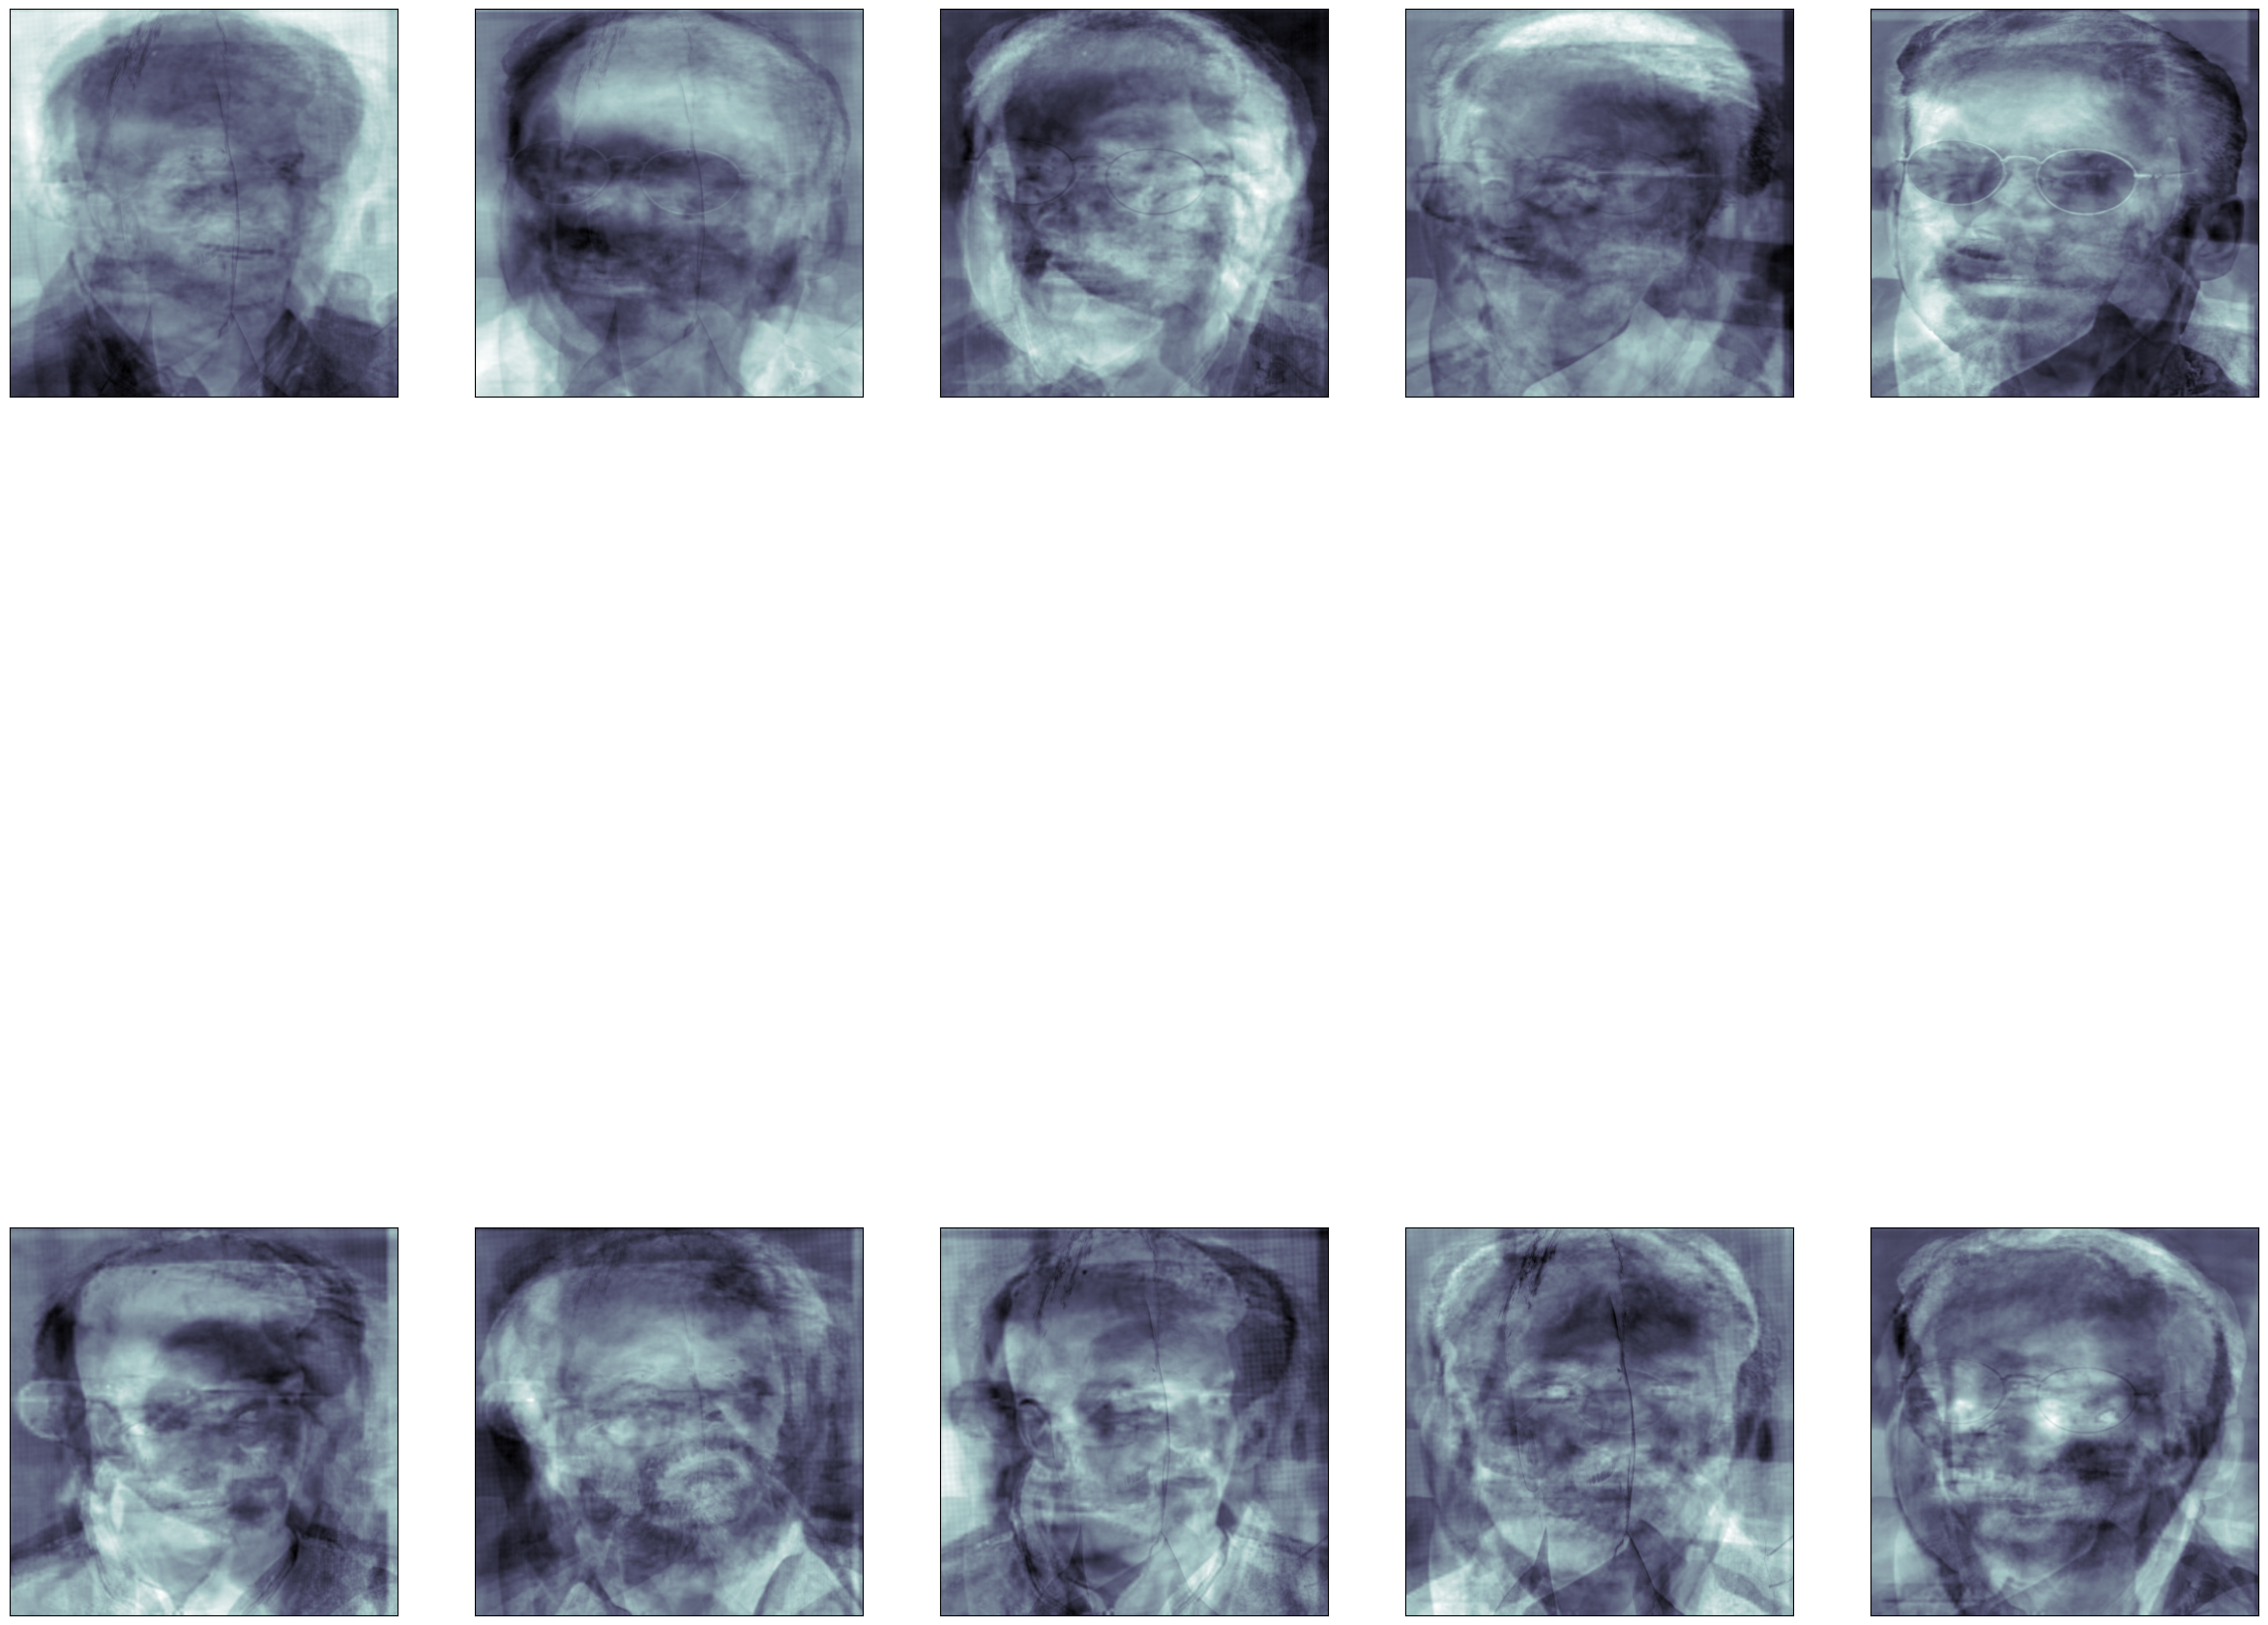

In [106]:
fig = plt.figure(figsize=(30,30))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(eigen.shape), cmap=plt.cm.bone)

# E1-Support Vector Machines Algorithm
       - We use the SVM algorithm for classifying the images
       - SVM (Support Vector Machines) is a classification technique
       - SVM comes under Supervised Learning

In [122]:
from sklearn import svm

# E2-Support Vector Machine Implementation
* We are going to perform Support Vector Classification
## So it is SVC

In [123]:
clf = svm.SVC(C=10, gamma=0.05, kernel='rbf')
clf.fit(x_train_pca, y_train)

SVC(C=10, gamma=0.05)

# F1-Image Prediction
    *Now we need to predict the images in the test set
    *We need to use the predict function

In [124]:
y_pred = clf.predict(x_test_pca)

In [125]:
y_pred

array(['dhanush', 'rajinikanth', 'rajinikanth', 'dhanush', 'rajinikanth',
       'vijay'], dtype=object)

# F2-Prediction Visualization
 * In the test set we randomly select 35 images
 * Reshape the images to original size
 * Display the predicted label with original image

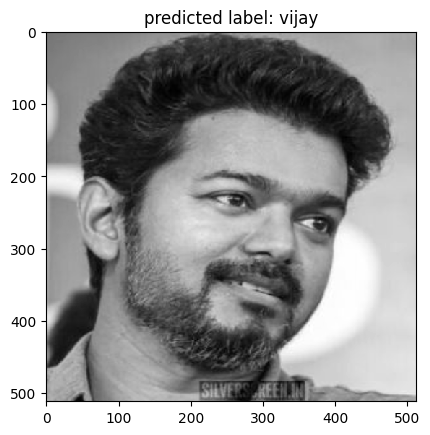

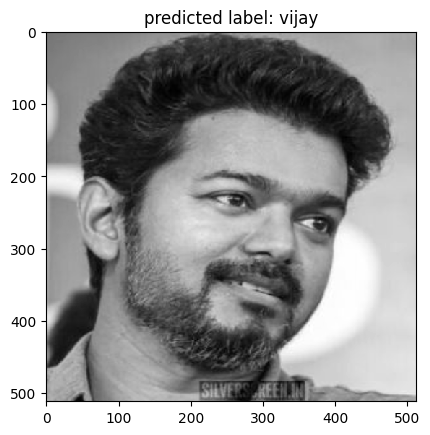

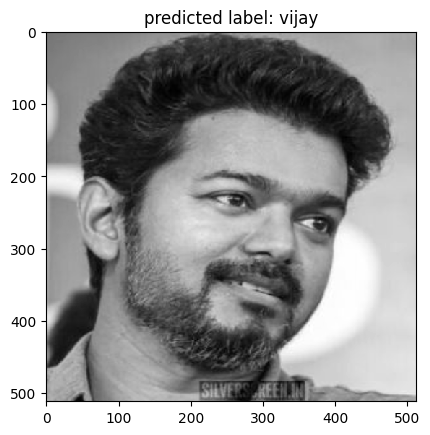

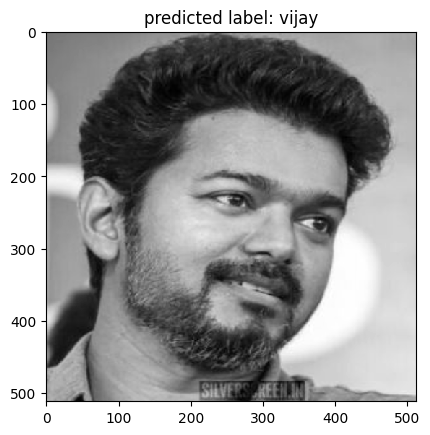

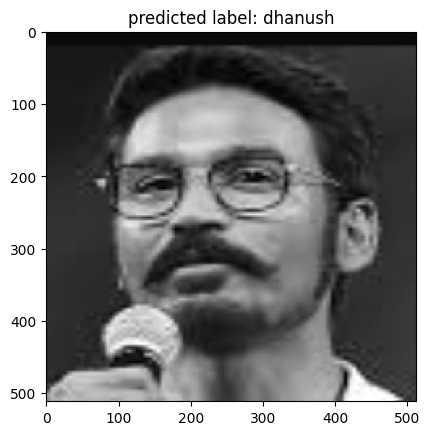

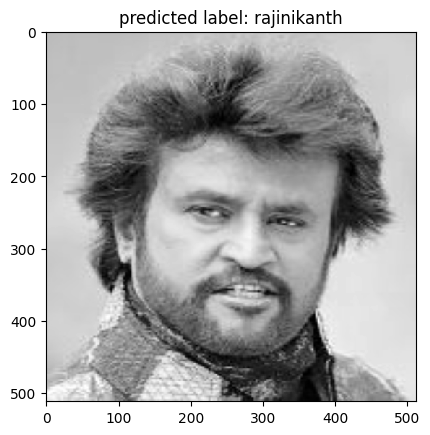

In [126]:
for i in (np.random.randint(0,6,6)):
    predicted_images = (np.reshape(x_test[i], (512,512)).astype(np.float64))
    plt.title('predicted label: {0}'. format(y_pred[i]))
    plt.imshow(predicted_images, interpolation='nearest', cmap='gray')
    plt.show()

# F3-Prediction Accuracy
* To check the accuracy we need to import a module called metrics
* In metrics, we use the function accuracy_score to check the accuracy

In [127]:
from sklearn import metrics

In [128]:
accuracy=metrics.accuracy_score(y_test,y_pred)

In [129]:
accuracy

0.8333333333333334

# F4-Error Analysis of Prediction

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix(y_test,y_pred)

array([[2, 0, 0],
       [0, 2, 0],
       [0, 1, 1]], dtype=int64)

# F5-classification report

In [132]:
from sklearn.metrics import classification_report

In [133]:
 print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     dhanush       1.00      1.00      1.00         2
 rajinikanth       0.67      1.00      0.80         2
       vijay       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.89      0.83      0.82         6
weighted avg       0.89      0.83      0.82         6

